In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary for Market Segmentation:

(1) spending: Amount spent by the customer per month (in 1000s)

(2) advance_payments: Amount paid by the customer in advance by cash (in 100s)

(3) probability_of_full_payment: Probability of payment done in full by the customer to the bank

(4) current_balance: Balance amount left in the account to make purchases (in 1000s)

(5) credit_limit: Limit of the amount in credit card (10000s)

(6) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

(7) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df=pd.read_csv('/Users/mac/Desktop/DataAnalysis/Python related files/CSV files/bank_marketing_part1_Data.csv')

# Performing EDA

#### Data has been loded into object df for further Analysis

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


#### Shape of the dataset

In [4]:
df.shape

(210, 7)

#### Checking the information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Checking the summary of dataset

In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


#### Checking for the missing values if any

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### Checking for the duplicated values in dataset 

In [9]:
dups=df.duplicated().sum()
dups

0

#### Checking for the outliers in the dataset

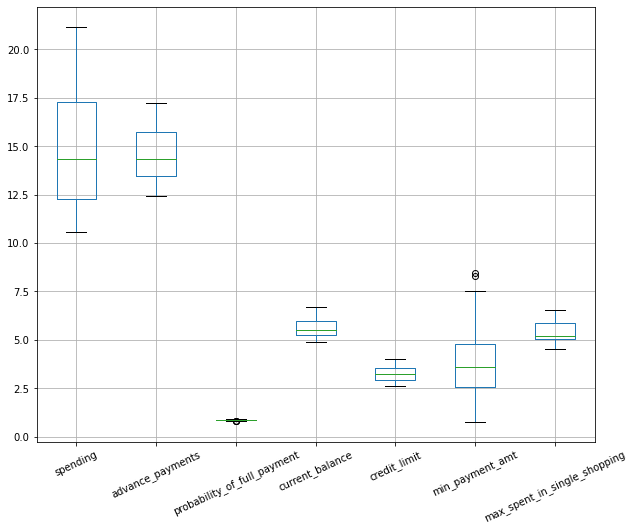

In [10]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation=25)
plt.show()

#### Uni-variate Analysis and Multi-variate Analysis

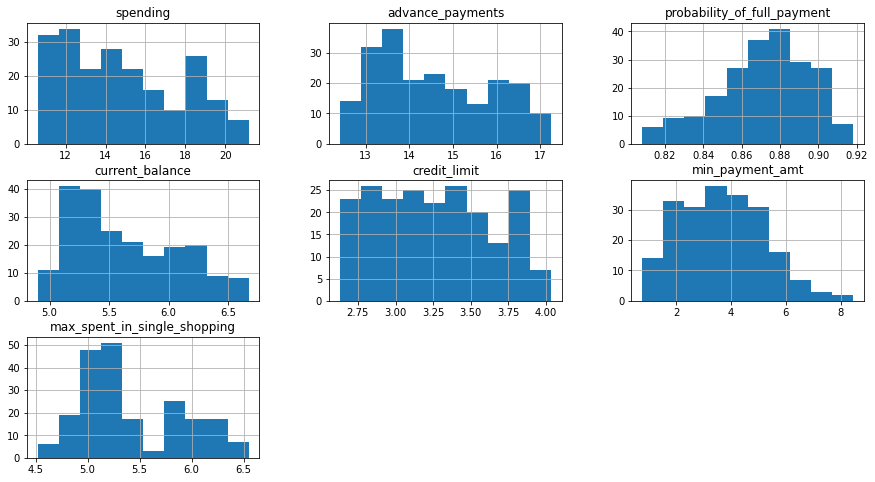

In [11]:
# univariate Analysis
df.hist(figsize=(15,8))
plt.show()

In [12]:
for i in df.columns:
    skewness_data=skew(df[i])
    print('skewness of {} is {}'.format(i,skewness_data))

skewness of spending is 0.39702715402072153
skewness of advance_payments is 0.38380604212562563
skewness of probability_of_full_payment is -0.5341035521949097
skewness of current_balance is 0.5217206481959239
skewness of credit_limit is 0.13341648969738146
skewness of min_payment_amt is 0.3987925792256687
skewness of max_spent_in_single_shopping is 0.5578758322317957


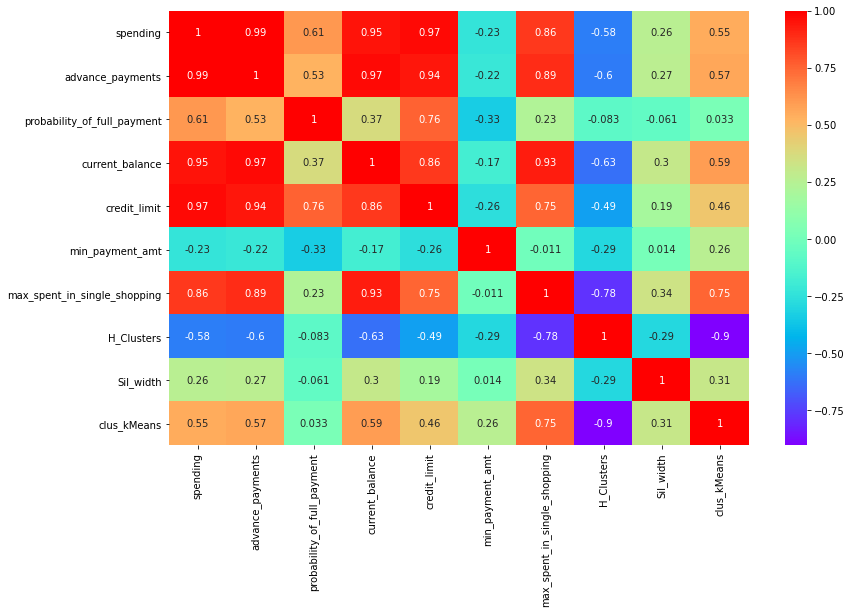

In [91]:
# Bi-variate Analysis
plt.figure(figsize=(13,8))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='rainbow')
plt.show()

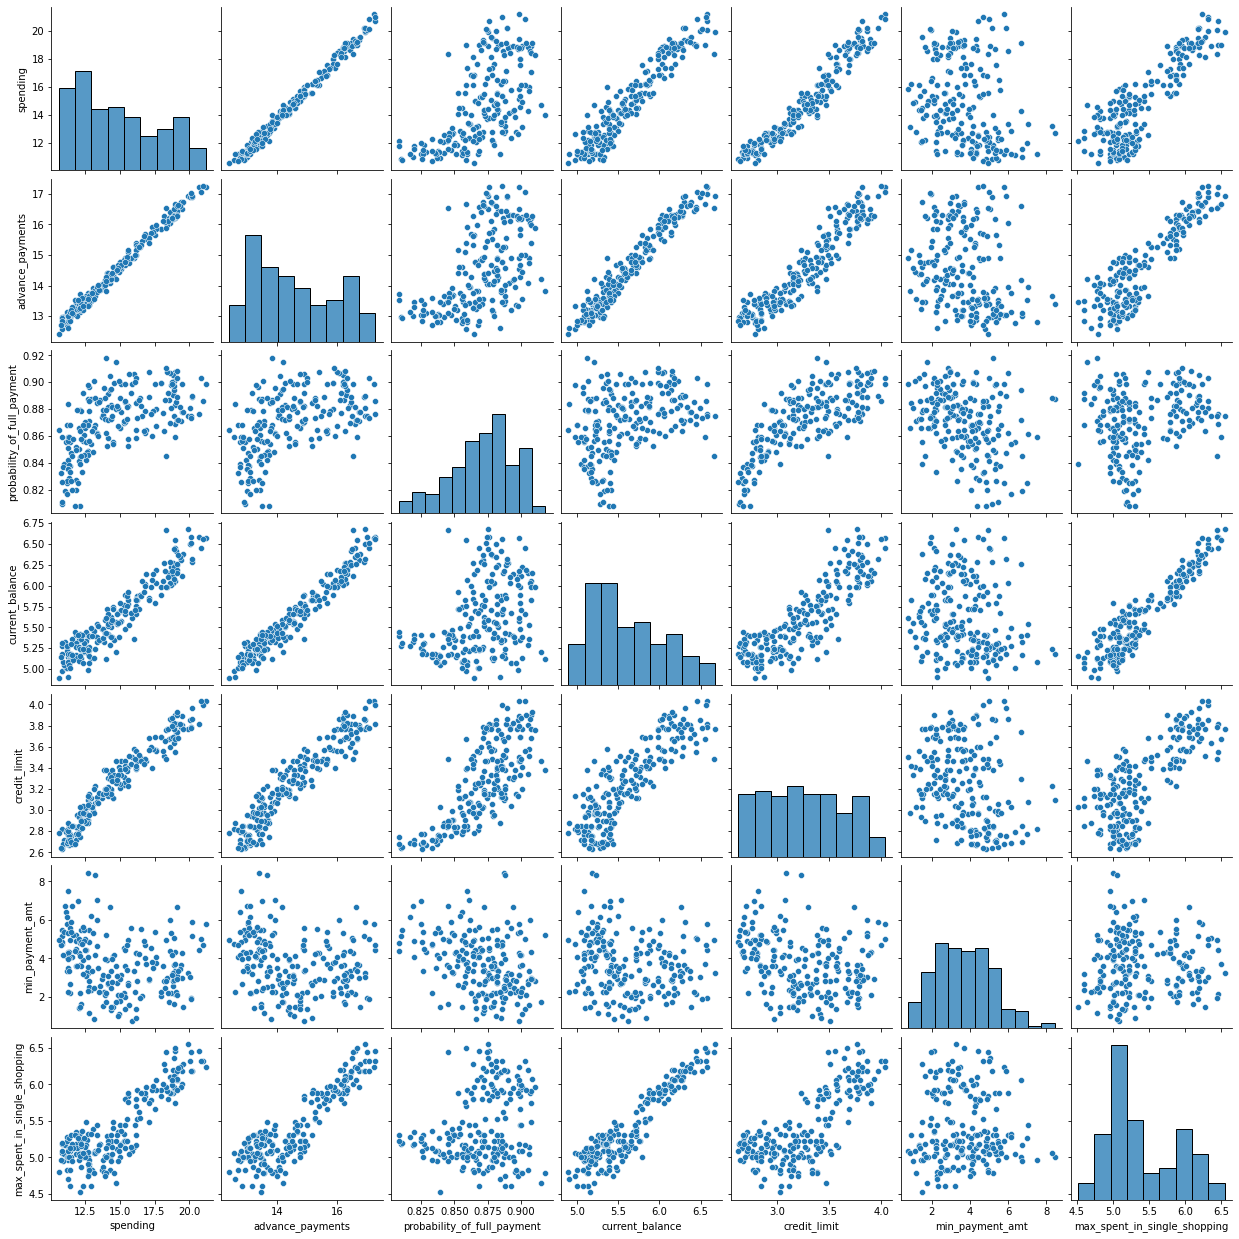

In [14]:
# Multi-variate Analysis
sns.pairplot(df)

### Inferance:
Analysis of the Above tables reveals following. 
1. Shape of the Dataset is 210 Rows * 7 Columns 
2. There are no null values. 
3. All the features data type is float 
4. There are no missing values. 
5. Mean & Median of all the features are almost similar 
6. Standard deviation of spending is highest. 
7. There are no duplicates 


# 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes scaling is very important for us in clustering as it based on distance computation ,hence unscaled data needs to be scaled before proceeding with clustering to avoid undue weightage given to values which are on higher scaler.

In [17]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Comparing max ,minimum and range of spending & advance payments with other features like current balance , credit limit , min payment amt ,max spent in single shopping & probability of full payment ,we can conclude that scaling is required .If we do not scale, model will give more weightage to spending & advance payments .

In [18]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
scaled_df1=x.fit_transform(df)
scaled_df1=pd.DataFrame(scaled_df1,index=df.index,columns=df.columns)
scaled_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage
Hclust=linkage(scaled_df1,method='ward')
    

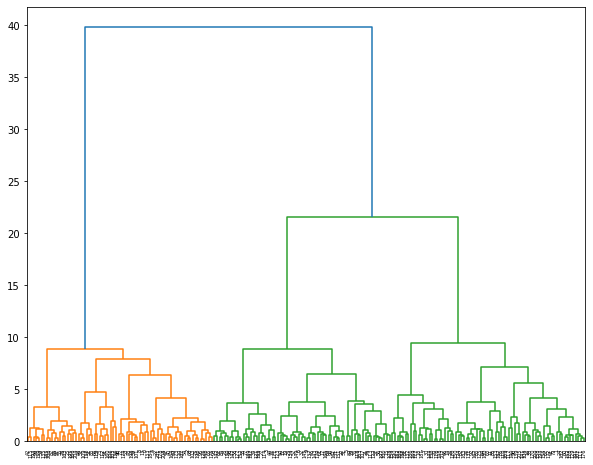

In [21]:
plt.figure(figsize=(10,8))
dend=dendrogram(Hclust)
plt.show()

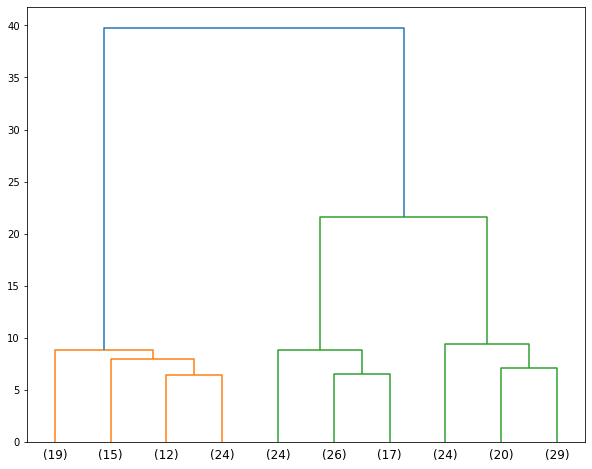

In [23]:
plt.figure(figsize=(10,8))
dend=dendrogram(Hclust,p=10,truncate_mode='lastp')
plt.show()

In [24]:
from scipy.cluster.hierarchy import fcluster
# method1
cluster=fcluster(Hclust,3,criterion='maxclust')
cluster

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
#method2
cluster1=fcluster(Hclust,18,criterion='distance')
cluster1


array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [31]:
df['H_Clusters']=cluster

#### Clusters frequency

In [32]:
df['H_Clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: H_Clusters, dtype: int64

In [33]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Based on dendrogram we have divided data into 3 clusters and number of data points in each cluster are approximately same as per above table .

In [34]:
avgbank=df.groupby('H_Clusters').mean()
avgbank['Freq']=df.H_Clusters.value_counts().sort_index()
avgbank

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.



In [35]:
from sklearn.cluster import KMeans

##### Considering the above dendrogram, let us assume that we want to divide the data into 3 clusters ,hence k=3.In K-mean clustering we need to define prior in how many clusters one wants to divide the data.

In [36]:
K_means3=KMeans(n_clusters=3,random_state=1)
K_means3.fit(scaled_df1)
labels3=K_means3.labels_
labels3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0], dtype=int32)

In [37]:
K_means3=KMeans(n_clusters=3,random_state=1)
K_means3.fit(scaled_df1)
K_means3.inertia_


430.65897315130064

In [38]:
wss=[]

In [39]:
for i in range(1,11):
    KM=KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [40]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

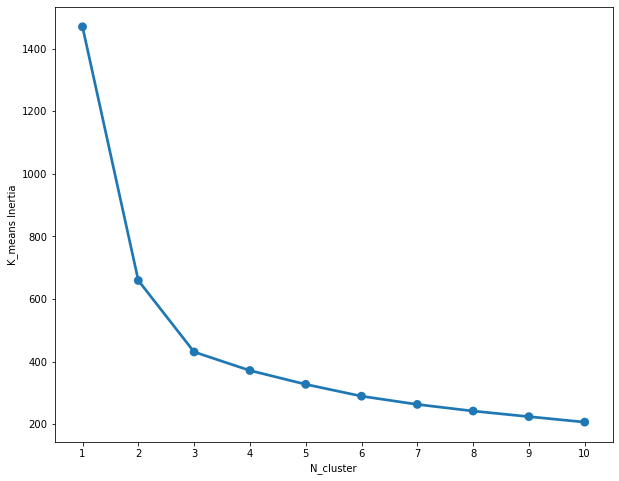

In [43]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,8))
sns.pointplot(a,wss)
plt.xlabel('N_cluster')
plt.ylabel('K_means Inertia')
plt.show()

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [46]:
silhouette_score(scaled_df1,labels3)

0.40072705527512986

In [47]:
k_means4=KMeans(n_clusters=4,random_state=1)
k_means4.fit(scaled_df1)
labels4=k_means4.labels_
labels4

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2], dtype=int32)

In [48]:
silhouette_score(scaled_df1,labels3)

0.40072705527512986

In [49]:
silhouette_score(scaled_df1,labels4)

0.3276547677266192

In [50]:
sil_width=silhouette_samples(scaled_df1,labels3)
df['Sil_width']=sil_width
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,Sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [51]:
silhouette_samples(scaled_df1,labels3).min()

0.002713089347678376

In [52]:
df['clus_kMeans']=labels3

In [53]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,Sil_width,clus_kMeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276,2


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [54]:
df.clus_kMeans.value_counts().sort_index()

0    71
1    72
2    67
Name: clus_kMeans, dtype: int64

In [56]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,Sil_width,clus_kMeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276,2


In [57]:
avgbankkmeans=df.groupby('clus_kMeans').mean()
avgbankkmeans['Freq']=df.clus_kMeans.value_counts().sort_index()
avgbankkmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,Sil_width,Freq
clus_kMeans,,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67


#### Based on the above table which provides average features values against the cluster we can divide the cluster in three category .
Looking at above summary we can conclude that 

(*) Cluster 0: Medium spending group, however the min payment amount is less compared to other least spending group. 

(*) Cluster 1: Least spending group. If you look at the minimum payment amount done by these group people are more than others. Averages of all other parameters are more or less same. We can try increasing the credit limit of the customers who fall under the cluster 1. Since the average amt spent in a single shopping is more are less equal to cluster 0. 

(*) Cluster 2: Premium group who spends more money. Credit limit and all other parameters are also relatively high compared to members of other clusters. The minimum payment amount is less compared to the least spending group. Bank can look into that to increase the minimum payment amount for the premium group.  


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### Data Dictionary for Insurance Firm DataSet

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration in days)

7. Destination of the tour (Destination)

8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

9. The commission received for tour insurance firm (Commission is in percentage of sales)

10. Age of insured (Age)

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [58]:
df2=pd.read_csv('/Users/mac/Desktop/DataAnalysis/Python related files/CSV files/insurance_part2_data.csv')

# Performing EDA

#### Data has been loded into object df2 for further Analysis

In [59]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


#### Checking the shape of Dataset

In [60]:
print('No of Rows in the dataset are {}\nNo of columns in the dataset are {}'.format(df2.shape[0],df2.shape[1]))

No of Rows in the dataset are 3000
No of columns in the dataset are 10


#### Checking for missing values.

In [61]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [62]:
df2.drop('Age',axis=1,inplace=True)

#### Checking the information of the dataset


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency_Code   3000 non-null   object 
 1   Type          3000 non-null   object 
 2   Claimed       3000 non-null   object 
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   object 
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 211.1+ KB


#### Checking the summary of the dataset

In [64]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


#### Checking for the duplicated Values 

In [65]:
dups2=df2.duplicated().sum()
dups2

474

#### Removing the Duplicated Values

In [66]:
df2.drop_duplicates(inplace=True)

In [67]:
df2.duplicated().sum()

0

In [68]:
df2.shape

(2526, 9)

#### checking for the outliers

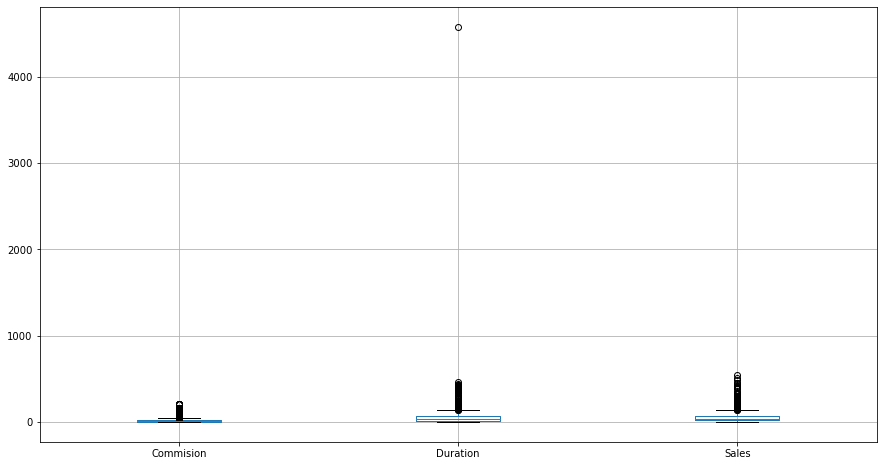

In [69]:
df2.plot(kind='box',figsize=(15,8))
plt.grid()
plt.show()

#### uni-variate Analysis

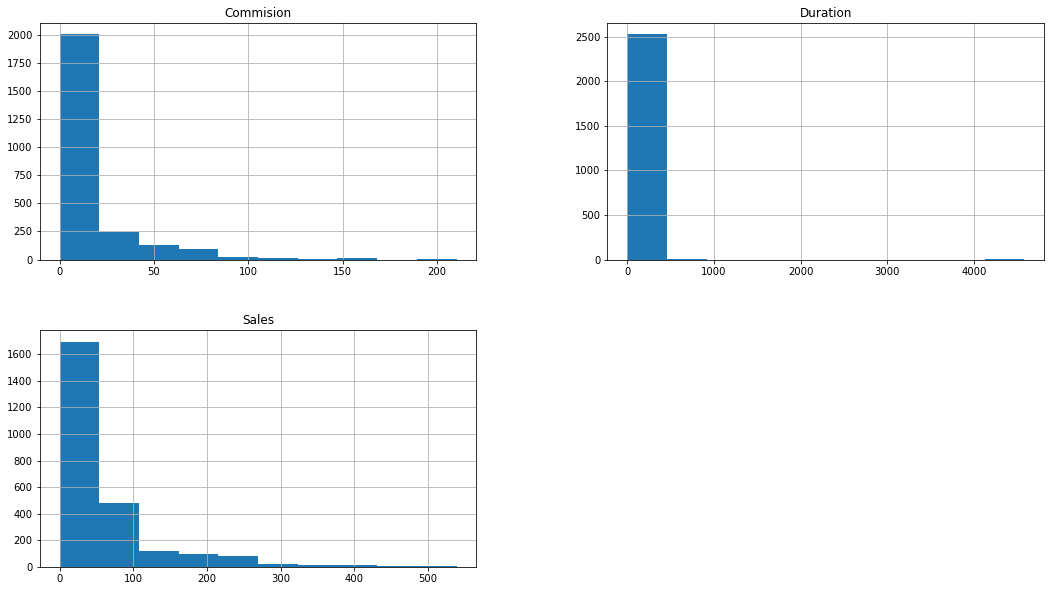

In [70]:
df2.hist(figsize=(18,10))
plt.show()

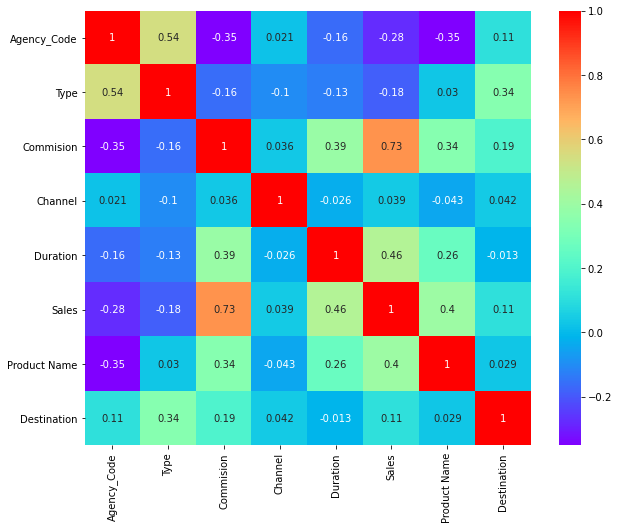

In [90]:
#### Bi-varaite Analysis
corr=df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='rainbow')
plt.show()

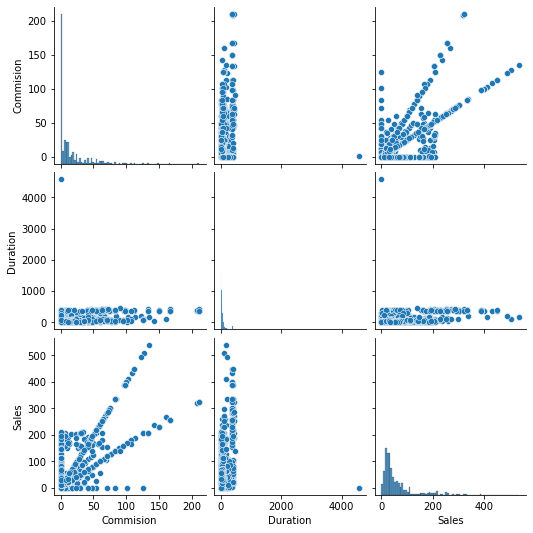

In [72]:
#### Multi-variate Analysis
sns.pairplot(df2)

### Inference:-

(1) There are a total of 3000 Rows in this Dataset and 9 columns

(2) There are no Null values present in this Dataset

(3) We could drop Age from this Dataset as in future Analysis it will not be of much importance

(4) looking at the summary of the Dataset we could find outliers are present and the same has to be removed.

(5) Total of 474 Duplicated Values were present in this which has been cleared.

(6) Commision, Duration & sales all are left skewed.

(7) Commision and sales are highly Co-related 

(8) Random Forest and ANN models can handle the outliers hence we have not removed them as of now

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

Since the object data types are different in order to do the analysis, we need to convert all of them into categorical code.

In [79]:
for i in df2.columns:
    if df2[i].dtype=='object':
        df2[i]=pd.Categorical(df2[i]).codes

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency_Code   2526 non-null   int8   
 1   Type          2526 non-null   int8   
 2   Claimed       2526 non-null   int8   
 3   Commision     2526 non-null   float64
 4   Channel       2526 non-null   int8   
 5   Duration      2526 non-null   int64  
 6   Sales         2526 non-null   float64
 7   Product Name  2526 non-null   int8   
 8   Destination   2526 non-null   int8   
dtypes: float64(2), int64(1), int8(6)
memory usage: 93.7 KB


#### Target or dependent variable in the data set is “Claimed” and all other variables are independent variables. If you look at the proportions of 1’s and 0’s of the target variable

#### Propotion of the target variable

In [81]:
df2.Claimed.value_counts(normalize=True)

0    0.68844
1    0.31156
Name: Claimed, dtype: float64

#### capture the target column ("Claimed") into separate vectors for training set and test set

In [82]:
x=df2.drop('Claimed',axis=1)
y=df2.pop('Claimed')

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

#### shape of the test and train data are as below

In [85]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

x_train (1768, 8)
x_test (758, 8)
y_train (1768,)
y_train (758,)


## Building classification model CART.

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
from sklearn import tree

In [120]:
df_model=DecisionTreeClassifier(criterion='gini')
df_model.fit(x_train,y_train)
train_char_labels=['No','Yes']
Tree_file=open('/Users/mac/Desktop/DataAnalysis/Python related files/CSV files/ProjectTree.dot','w')
dot_data=tree.export_graphviz(df_model,out_file=Tree_file,feature_names=list(x_train),class_names=list(train_char_labels))
Tree_file.close()                             

In [121]:
print (pd.DataFrame(df_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.360555
Sales         0.234024
Product Name  0.171220
Commision     0.139982
Agency_Code   0.046595
Destination   0.034937
Channel       0.008437
Type          0.004250


In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid={'max_depth':[7,8,9,10],
           'min_samples_leaf':[15,20,25],
           'min_samples_split':[45,60,75]}

In [124]:
df_model=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=df_model,param_grid=param_grid,cv=3)

In [125]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [126]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [131]:
best_gridcart=grid_search.best_estimator_
best_gridcart

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=75)

### Generating Tree

In [98]:
train_char_labels=['No','Yes']
reg_Tree_file=open('/Users/mac/Desktop/DataAnalysis/Python related files/CSV files/reg_ProjectTree.dot','w')
dot_data=tree.export_graphviz(best_grid,out_file=reg_Tree_file,feature_names=list(x_train),class_names=list(train_char_labels))
reg_Tree_file.close()  

#### Predicting on Training and Testing Dataset


In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [100]:
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

In [101]:
cart_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1212
           1       0.67      0.53      0.59       556

    accuracy                           0.77      1768
   macro avg       0.74      0.70      0.71      1768
weighted avg       0.76      0.77      0.76      1768



In [102]:
cart_metrics=classification_report(y_test,ytest_predict,output_dict=True)
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       527
           1       0.61      0.50      0.55       231

    accuracy                           0.75       758
   macro avg       0.70      0.68      0.69       758
weighted avg       0.74      0.75      0.74       758



If you look at the test and train data set classification the accuracy is 75% and the baseline accuracy is 68%. The model is performing better than the baseline accuracy.

Recall % and F1 % are more for train set than the test set. The test set performance is with in the 10% so its no overfitting or unfitting.

## Building a Random Forest Classifier


Similar to CART model we are going to use the classifier for generating the Random forest and the same has been given below.

In Random forest if we have too many arguments the model will run for longer time. We can change the arguments and rerun again. Once after the model run is completed, we are fitting the model and then getting the best parameter and estimator

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
param_grid={'max_depth':[5,7,10],
            'max_features':[4,6],
           'min_samples_leaf':[5,10],
           'min_samples_split':[50,100],
           'n_estimators':[100,200,300]}
rfcl=RandomForestClassifier(random_state=0)
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [106]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 100}

In [107]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=5,
                       min_samples_split=100, random_state=0)

In [108]:
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

#### Classification Report on Train data

In [109]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1212
           1       0.69      0.49      0.57       556

    accuracy                           0.77      1768
   macro avg       0.74      0.69      0.71      1768
weighted avg       0.76      0.77      0.76      1768



In [110]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       527
           1       0.64      0.48      0.55       231

    accuracy                           0.76       758
   macro avg       0.72      0.68      0.69       758
weighted avg       0.75      0.76      0.75       758



If you look at the test and train data set classification the accuracy is 77% and the baseline accuracy is 68%. The model is performing better than the baseline accuracy.

Recall % and F1 % are more for train set than the test set. The test set performance is with in the 10% so there is no overfitting or underfitting.

## Building a Neural Network Classifier


#### Similar to other models we are creating the MLP grid values and get the bets parameter and best estimator values as below.

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
param_grid={'hidden_layer_sizes':[100],
           'max_iter':[2500],
           'solver':['adam'],
           'tol':[0.01],}
nncl=MLPClassifier(random_state=1)
grid_search=GridSearchCV(estimator=nncl,param_grid=param_grid,cv=10)

In [113]:
grid_search.fit(x_train,y_train)
grid_search.best_params_


{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [114]:
best_grid=grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [115]:
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

In [116]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1212
           1       0.68      0.29      0.40       556

    accuracy                           0.73      1768
   macro avg       0.71      0.61      0.61      1768
weighted avg       0.72      0.73      0.69      1768



In [117]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       527
           1       0.65      0.29      0.40       231

    accuracy                           0.74       758
   macro avg       0.70      0.61      0.61       758
weighted avg       0.72      0.74      0.70       758



If you look at the test and train data set classification the accuracy is 73% and the baseline accuracy is 68%. The model is performing better than the baseline accuracy.

Recall % and F1 % are more for train set than the test set. However, the recall % is very low compared to other and also its less than .5.


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# CART:

In [129]:
print(pd.DataFrame(best_gridcart.feature_importances_,columns=['IMP'],index=x_train.columns).sort_values('IMP',ascending=False))

                   IMP
Product Name  0.616407
Agency_Code   0.145606
Commision     0.085729
Sales         0.084488
Duration      0.064454
Destination   0.003317
Type          0.000000
Channel       0.000000


### AUC/ROC for Training data is given below, ROC is a curve represents TP rate and FP rate

## For Training Data:

AUC 0.803654106417836


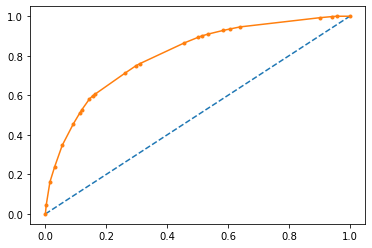

In [136]:
probs=best_gridcart.predict_proba(x_train)
probs=probs[:,1]
print('AUC',roc_auc_score(y_train,probs))
fpr,tpr,thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### For Test Data:

AUC 0.7592802516901189


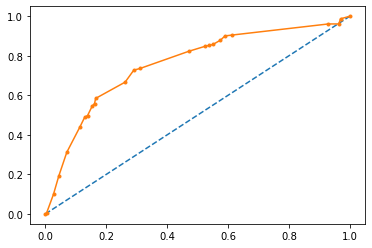

In [137]:
probs=best_gridcart.predict_proba(x_test)
probs=probs[:,1]
print('AUC',roc_auc_score(y_test,probs))
fpr,tpr,thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()